# Part A

AIM: Simple linear regression and Multiclass linear regression with data preprocessing (Handling NA values)

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, roc_curve, roc_auc_score, auc, r2_score
import warnings
warnings.filterwarnings('ignore')

Step 1: Load the dataset (Use pandas)

In [4]:
data = pd.read_csv("DSc-1b-dataset.csv")

In [5]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [6]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Step 2: Data Pre-processing (Handling NA values)

In [8]:
# count of null values in each column
print(data.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [9]:
#Divide into categorical and numerical columns
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_col = []
cat_col = []
features = data.columns.values.tolist()

In [10]:
for col in features:
    if data[col].dtype in numerics:
        num_col.append(col)
    else:
        cat_col.append(col)

In [11]:
print("Numerical Columns: ", num_col)

Numerical Columns:  ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin']


In [12]:
print("Categorical Columns: ", cat_col)

Categorical Columns:  ['horsepower', 'car name']


In [13]:
#get the unique values of column horsepower
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [15]:
# Here, ? indicates null values. 
data.loc[data['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [18]:
#Reading data again but this time we specify ? as null values
data = pd.read_csv("DSc-1b-dataset.csv", na_values=['?'])

In [19]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [21]:
data.isnull().sum() # shows that horsepower column contains 6 null values

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [23]:
# Converting the required column to numeric
data['horsepower'] = data['horsepower'].astype(str).astype(float)
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [25]:
#Handle missing data - Replace with median
data.median()

mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
model year        76.0
origin             1.0
dtype: float64

In [28]:
data['horsepower']=data['horsepower'].fillna(data['horsepower'].median())
data.isnull().sum() # to check if all the NA values were handled properly

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [29]:
#Column car_name is irrelevant for our analysis hence we will drop it
data = data.drop('car name', axis=1)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [30]:
#Also, we will replace the origin column
data['origin'] = data['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,america
1,15.0,8,350.0,165.0,3693,11.5,70,america
2,18.0,8,318.0,150.0,3436,11.0,70,america
3,16.0,8,304.0,150.0,3433,12.0,70,america
4,17.0,8,302.0,140.0,3449,10.5,70,america
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,america
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,america
396,28.0,4,120.0,79.0,2625,18.6,82,america


In [31]:
data = pd.get_dummies(data, columns=['origin'])
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,0,1
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    float64
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   origin_america  398 non-null    uint8  
 8   origin_asia     398 non-null    uint8  
 9   origin_europe   398 non-null    uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 23.1 KB


Step 3: Exploratory Data Analysis (understanding the relationships between the variables with help of plot, scatter-plot, enery-plot etc) Use matplotlib

Scatterplot

<Figure size 720x720 with 0 Axes>

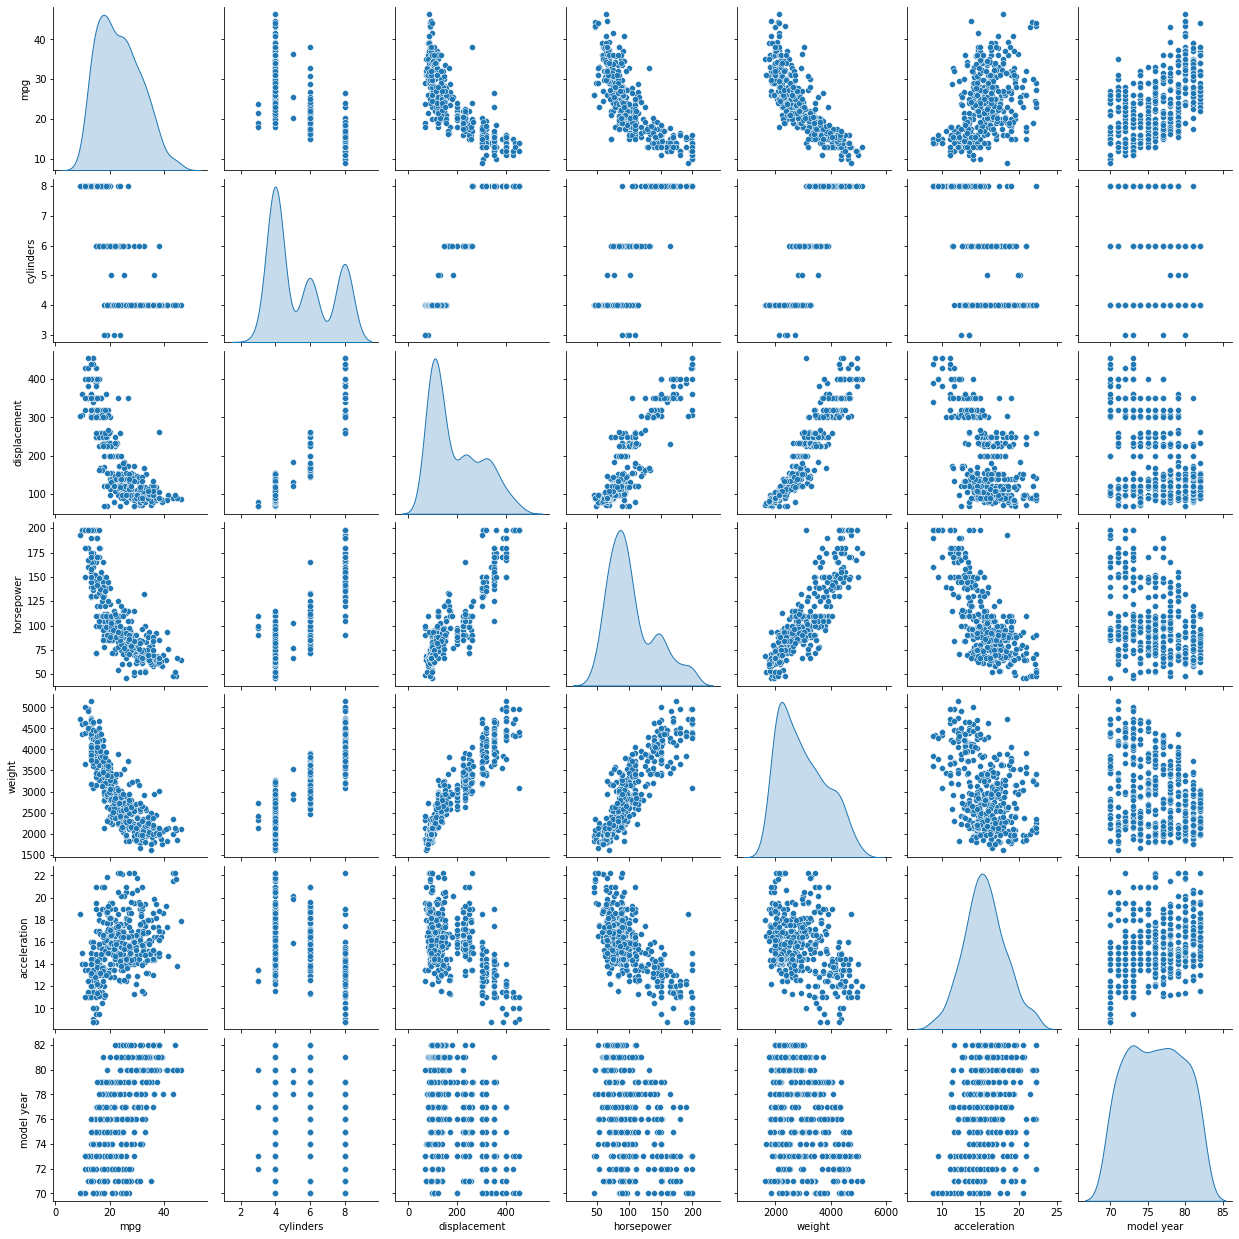

In [50]:
df_plot = data.iloc[:, 0:7]
plt.figure(figsize=(10,10))
sns.pairplot(df_plot, diag_kind='kde')
plt.show()

Histogram

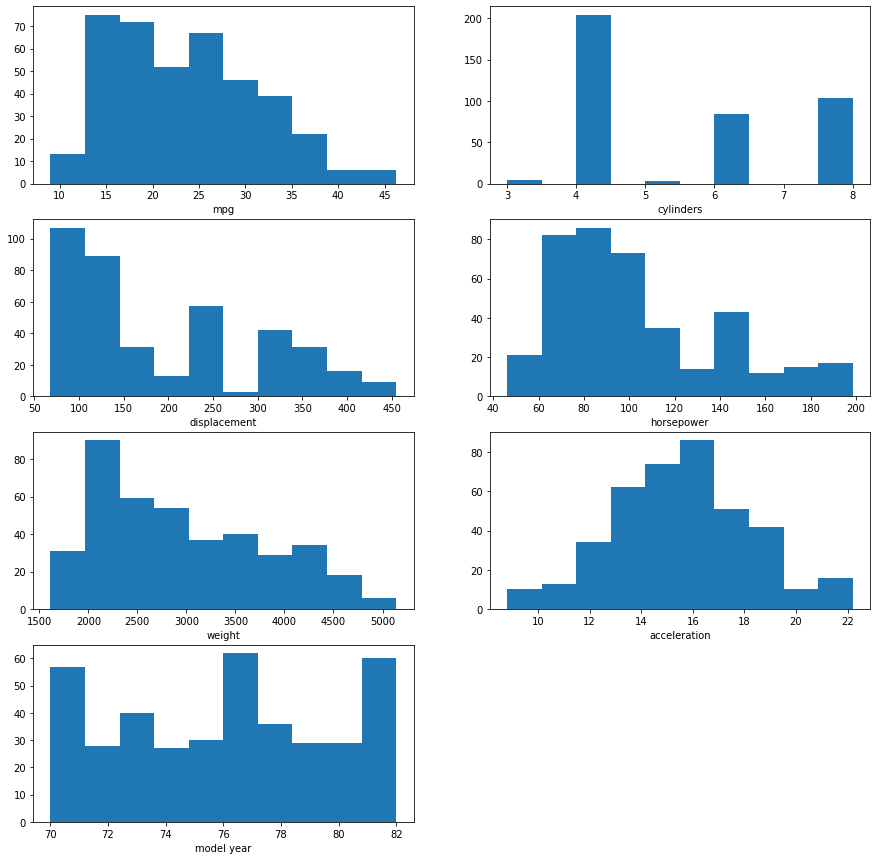

In [52]:
plt.figure(figsize=(15,15))
col = df_plot.columns
for i in range(0,len(col)):
    plt.subplot(len(col)//2+1,2,i+1)
    plt.hist(data[col[i]]);
    plt.xlabel(col[i])

Correlation Matrix

--> -1 indicates a perfectly negative linear correlation between two variables

--> 0 indicates no linear correlation between two variables

--> 1 indicates a perfectly positive linear correlation between two variables

The further away the correlation coefficient is from zero, the stronger the relationship between the two variables.

Correlation Matrix before treating outliers


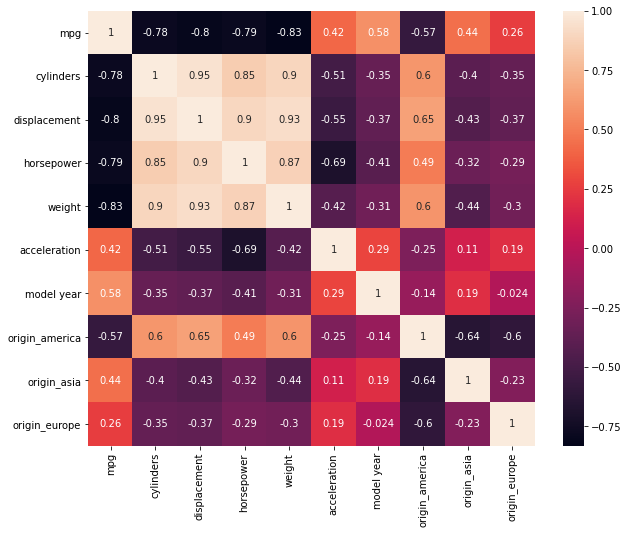

In [53]:
correlation_data = data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(correlation_data, annot=True)
print("Correlation Matrix before treating outliers")
plt.show()

In [54]:
#Arranging columns in descending order wrt MPG
correlation_values = correlation_data['mpg'].sort_values(ascending=False)
correlation_values = abs(correlation_values).sort_values(ascending=False)
print(abs(correlation_values).sort_values(ascending=False))

mpg               1.000000
weight            0.831901
displacement      0.804353
horsepower        0.785846
cylinders         0.775556
model year        0.579337
origin_america    0.568234
origin_asia       0.442094
acceleration      0.418333
origin_europe     0.259160
Name: mpg, dtype: float64


Boxplot

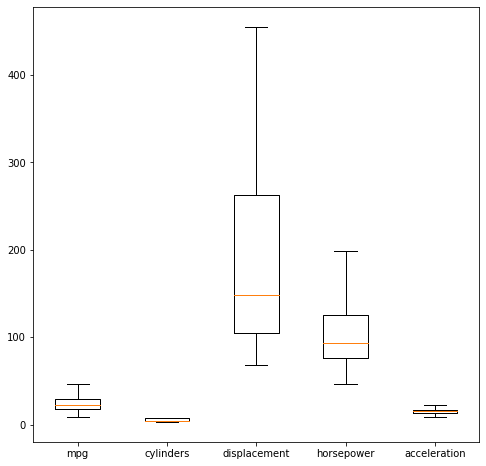

In [55]:
data_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
plt.figure(figsize=(8,8))
plt.boxplot([vals.dropna() for col, vals in data[['mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration']].iteritems()])
plt.xticks([1,2,3,4,5], ['mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration'])
plt.show()

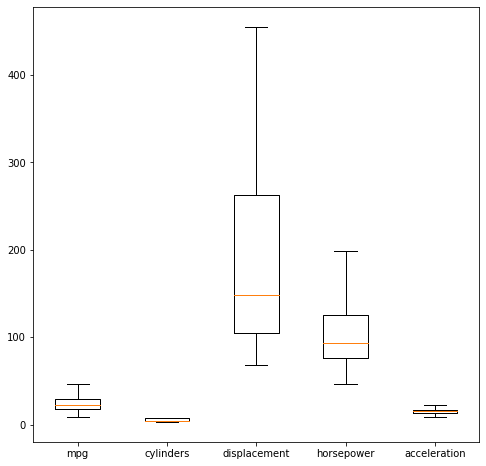

In [56]:
def treat_outliers():
    for col in data_columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_Whisker = Q1 - 1.5*IQR
        Upper_Whisker = Q3 +1.5*IQR
        data.loc[(data[col] > Upper_Whisker), col] = Upper_Whisker
        data.loc[(data[col] < Lower_Whisker), col] = Lower_Whisker
treat_outliers()
plt.figure(figsize=(8,8))
plt.boxplot([vals.dropna() for col, vals in data[['mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration']].iteritems()])
plt.xticks([1,2,3,4,5], ['mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration'])
plt.show()

Correlation Matrix after treating outliers


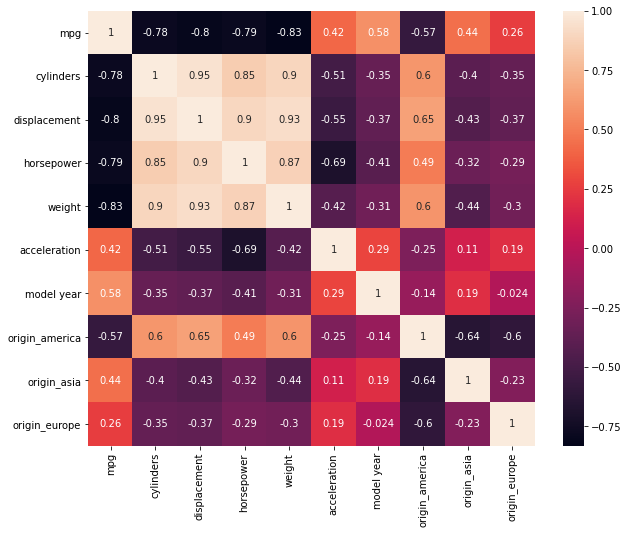

In [57]:
print("Correlation Matrix after treating outliers")
correlation_data = data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(correlation_data, annot=True)
plt.show()

In [58]:
correlation_values = correlation_data['mpg'].sort_values(ascending=False)
correlation_values = abs(correlation_values).sort_values(ascending=False)
print(abs(correlation_values).sort_values(ascending=False))

mpg               1.000000
weight            0.831901
displacement      0.804353
horsepower        0.785846
cylinders         0.775556
model year        0.579337
origin_america    0.568234
origin_asia       0.442094
acceleration      0.418333
origin_europe     0.259160
Name: mpg, dtype: float64


Step 4: Data Partition (80% for training and 20% for testing) (Use scikit-learn)

In [60]:
#Define indepenedent and dependent attributes respectively and split into 80:20
X = data.drop(columns='mpg')
Y = data[['mpg']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=27)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

Step 5: Build the model (use scikit learn)

In [61]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

Step 6: Summarize the model

In [62]:
linear_regression_model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

Step 7: Prediction

In [64]:
y_pred = linear_regression_model.predict(X_test)
for idx, col_name in enumerate(data.drop(columns='mpg').columns):
    print(f"Coefficient for {col_name}: {linear_regression_model.coef_[0][idx]}")

Coefficient for cylinders: -0.08864898568842941
Coefficient for displacement: 1.6723209228870035
Coefficient for horsepower: -1.0477717784631766
Coefficient for weight: -5.303727163575023
Coefficient for acceleration: -0.00476072698029717
Coefficient for model year: 2.733954813721744
Coefficient for origin_america: 101708671415593.5
Coefficient for origin_asia: 81745096894658.06
Coefficient for origin_europe: 81193025283303.02


Step 8: Evaluate the model

In [67]:
linear_regression_score = linear_regression_model.score(X_test, y_test)
print("Score of Linear Regression Model: ", round(linear_regression_score, 5))
print("Mean squared error: ", round(mean_squared_error(y_test, y_pred), 5))

Score of Linear Regression Model:  0.88353
Mean squared error:  8.33141


# Part B

AIM: Estimating horse fatalities from colic- use logistic regression to try to predict if a horse with colic will live or die

Follow the general steps to carry out logistic regression as mentioned in Part-A.

Calculate the performance metrics-Accuracy, Miss-classification rate, Receiver operating characteristics.

Step 1: Load the dataset (Use pandas )

In [4]:
data = pd.read_csv("DSc-1-dataset.csv")

In [5]:
data

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [7]:
data.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


Step 2: Data Preprocessing (Handling NA values)

In [8]:
data.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [9]:
# Find and remove columns having more than 40% null values 
null_columns = data.columns[data.isna().mean() > 0.40]
null_columns

Index(['nasogastric_reflux_ph', 'abdomo_appearance', 'abdomo_protein'], dtype='object')

In [10]:
data = data.drop(columns = null_columns)
data

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,decreased,distend_large,45.0,8.4,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,absent,other,50.0,85.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,normal,normal,33.0,6.7,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,decreased,NaN,48.0,7.2,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,NaN,NaN,74.0,7.4,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,NaN,distend_large,55.0,65.0,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,absent,distend_small,44.0,NaN,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,decreased,distend_large,60.0,6.8,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,absent,distend_small,50.0,6.0,lived,yes,2208,0,0,yes


In [11]:
# Divide into numerical and categorical
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = []
categorical_columns = []
features = data.columns.values.tolist()
for col in features:
    if data[col].dtype in numerics:
        numerical_columns.append(col)
    else:
        categorical_columns.append(col)

In [12]:
print("Numerical Columns: ", numerical_columns)

Numerical Columns:  ['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 'lesion_1', 'lesion_2', 'lesion_3']


In [13]:
print("\nCategorical Columns: ", categorical_columns)


Categorical Columns:  ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'outcome', 'surgical_lesion', 'cp_data']


In [14]:
# Replace the Nan values in numerical  and categorical columns with their median and mode respectibely
for col in numerical_columns:
    data.loc[(data["outcome"] == 'died') & (data[col].isnull()), col] = data[data["outcome"] == 'died'][col].median()
    data.loc[(data["outcome"] == 'euthanized') & (data[col].isnull()), col] = data[data["outcome"] == 'euthanized'][col].median()
    data.loc[(data["outcome"] == 'lived') & (data[col].isnull()), col] = data[data["outcome"] == 'lived'][col].median()

In [15]:
for col in categorical_columns:
    data.loc[(data["outcome"] == 'died') & (data[col].isnull()), col] = data[data["outcome"] == 'died'][col].mode()[0]
    data.loc[(data["outcome"] == 'euthanized') & (data[col].isnull()), col] = data[data["outcome"] == 'euthanized'][col].mode()[0]
    data.loc[(data["outcome"] == 'lived') & (data[col].isnull()), col] = data[data["outcome"] == 'lived'][col].mode()[0]

In [16]:
#Convert categorical data into numeric data
for col in categorical_columns:
    cat_data = data[col].astype('category')
    mapping = dict(enumerate(cat_data.cat.categories))
    print(col," : ",mapping,"\n")

surgery  :  {0: 'no', 1: 'yes'} 

age  :  {0: 'adult', 1: 'young'} 

temp_of_extremities  :  {0: 'cold', 1: 'cool', 2: 'normal', 3: 'warm'} 

peripheral_pulse  :  {0: 'absent', 1: 'increased', 2: 'normal', 3: 'reduced'} 

mucous_membrane  :  {0: 'bright_pink', 1: 'bright_red', 2: 'dark_cyanotic', 3: 'normal_pink', 4: 'pale_cyanotic', 5: 'pale_pink'} 

capillary_refill_time  :  {0: '3', 1: 'less_3_sec', 2: 'more_3_sec'} 

pain  :  {0: 'alert', 1: 'depressed', 2: 'extreme_pain', 3: 'mild_pain', 4: 'severe_pain'} 

peristalsis  :  {0: 'absent', 1: 'hypermotile', 2: 'hypomotile', 3: 'normal'} 

abdominal_distention  :  {0: 'moderate', 1: 'none', 2: 'severe', 3: 'slight'} 

nasogastric_tube  :  {0: 'none', 1: 'significant', 2: 'slight'} 

nasogastric_reflux  :  {0: 'less_1_liter', 1: 'more_1_liter', 2: 'none'} 

rectal_exam_feces  :  {0: 'absent', 1: 'decreased', 2: 'increased', 3: 'normal'} 

abdomen  :  {0: 'distend_large', 1: 'distend_small', 2: 'firm', 3: 'normal', 4: 'other'} 

outcome

In [17]:
for col in categorical_columns:
    data[col] = data[col].astype('category').cat.codes
data

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,530101.0,38.50,66.0,28.0,1,3,4,2,...,1,0,45.0,8.4,0,0,11300.0,0.0,0.0,0
1,1,0,534817.0,39.20,88.0,20.0,1,3,4,1,...,0,4,50.0,85.0,1,0,2208.0,0.0,0.0,0
2,0,0,530334.0,38.30,40.0,24.0,2,2,5,1,...,3,3,33.0,6.7,2,0,0.0,0.0,0.0,1
3,1,1,5290409.0,39.10,164.0,84.0,0,2,2,2,...,1,0,48.0,7.2,0,1,2208.0,0.0,0.0,1
4,0,0,530255.0,37.30,104.0,35.0,1,3,2,2,...,0,0,74.0,7.4,0,0,4300.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,0,533886.0,38.05,120.0,70.0,0,3,4,2,...,0,0,55.0,65.0,1,0,3205.0,0.0,0.0,0
295,0,0,527702.0,37.20,72.0,24.0,1,1,4,2,...,0,1,44.0,56.0,1,1,2208.0,0.0,0.0,1
296,1,0,529386.0,37.50,72.0,30.0,0,3,4,1,...,1,0,60.0,6.8,0,1,3205.0,0.0,0.0,0
297,1,0,530612.0,36.50,100.0,24.0,1,3,5,1,...,0,1,50.0,6.0,2,1,2208.0,0.0,0.0,1


In [18]:
data.info() # to check if the columns are numerical - int, float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    int8   
 1   age                    299 non-null    int8   
 2   hospital_number        299 non-null    float64
 3   rectal_temp            299 non-null    float64
 4   pulse                  299 non-null    float64
 5   respiratory_rate       299 non-null    float64
 6   temp_of_extremities    299 non-null    int8   
 7   peripheral_pulse       299 non-null    int8   
 8   mucous_membrane        299 non-null    int8   
 9   capillary_refill_time  299 non-null    int8   
 10  pain                   299 non-null    int8   
 11  peristalsis            299 non-null    int8   
 12  abdominal_distention   299 non-null    int8   
 13  nasogastric_tube       299 non-null    int8   
 14  nasogastric_reflux     299 non-null    int8   
 15  rectal

Step 3: Exploratory Data Analysis (understanding the relationships between the variables with help of plot, scatter-plot, enery-plot etc) Use matplotlib

Scatter-plot

<Figure size 720x720 with 0 Axes>

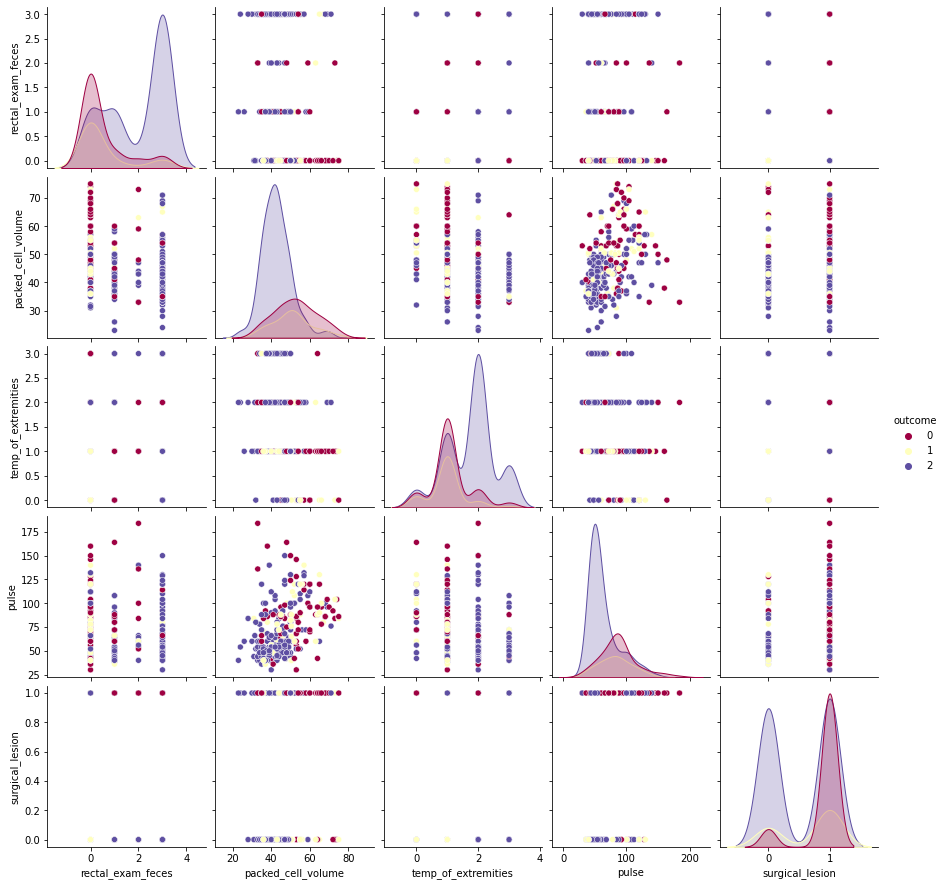

In [23]:
plt.figure(figsize=(10,10))
sns.pairplot(data.loc[:,['rectal_exam_feces', 'packed_cell_volume', 'temp_of_extremities', 'pulse', 'surgical_lesion','outcome']], hue='outcome', palette="Spectral")
plt.show()

In [24]:
data['outcome'].value_counts()

2    178
0     77
1     44
Name: outcome, dtype: int64

Maximum correlated features with the outcome plotted using KDE

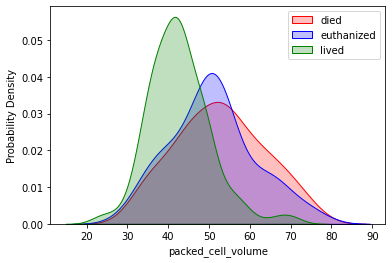

In [20]:
#KDE for packed cell volume
ax = sns.kdeplot(data.loc[(data['outcome']==0),
            'packed_cell_volume'], color='red', shade=True, Label='died')
  
sns.kdeplot(data.loc[(data['outcome']==1), 
            'packed_cell_volume'], color='blue', shade=True, Label='euthanized')

sns.kdeplot(data.loc[(data['outcome']==2), 
            'packed_cell_volume'], color='green', shade=True, Label='lived')
plt.legend()
plt.xlabel('packed_cell_volume')
plt.ylabel('Probability Density')
plt.show()

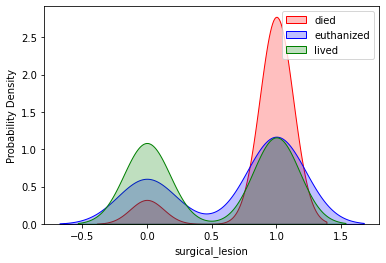

In [22]:
#KDE for surgical lesion
ax = sns.kdeplot(data.loc[(data['outcome']==0),
            'surgical_lesion'], color='red', shade=True, Label='died')
  
sns.kdeplot(data.loc[(data['outcome']==1), 
            'surgical_lesion'], color='blue', shade=True, Label='euthanized')

sns.kdeplot(data.loc[(data['outcome']==2), 
            'surgical_lesion'], color='green', shade=True, Label='lived')
plt.legend()
plt.xlabel('surgical_lesion')
plt.ylabel('Probability Density')
plt.show()

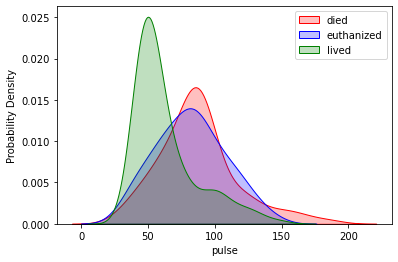

In [21]:
#KDE for pulse
ax = sns.kdeplot(data.loc[(data['outcome']==0),
            'pulse'], color='red', shade=True, Label='died')
  
sns.kdeplot(data.loc[(data['outcome']==1), 
            'pulse'], color='blue', shade=True, Label='euthanized')

sns.kdeplot(data.loc[(data['outcome']==2), 
            'pulse'], color='green', shade=True, Label='lived')
plt.legend()
plt.xlabel('pulse')
plt.ylabel('Probability Density')
plt.show()

Correlation Matrix

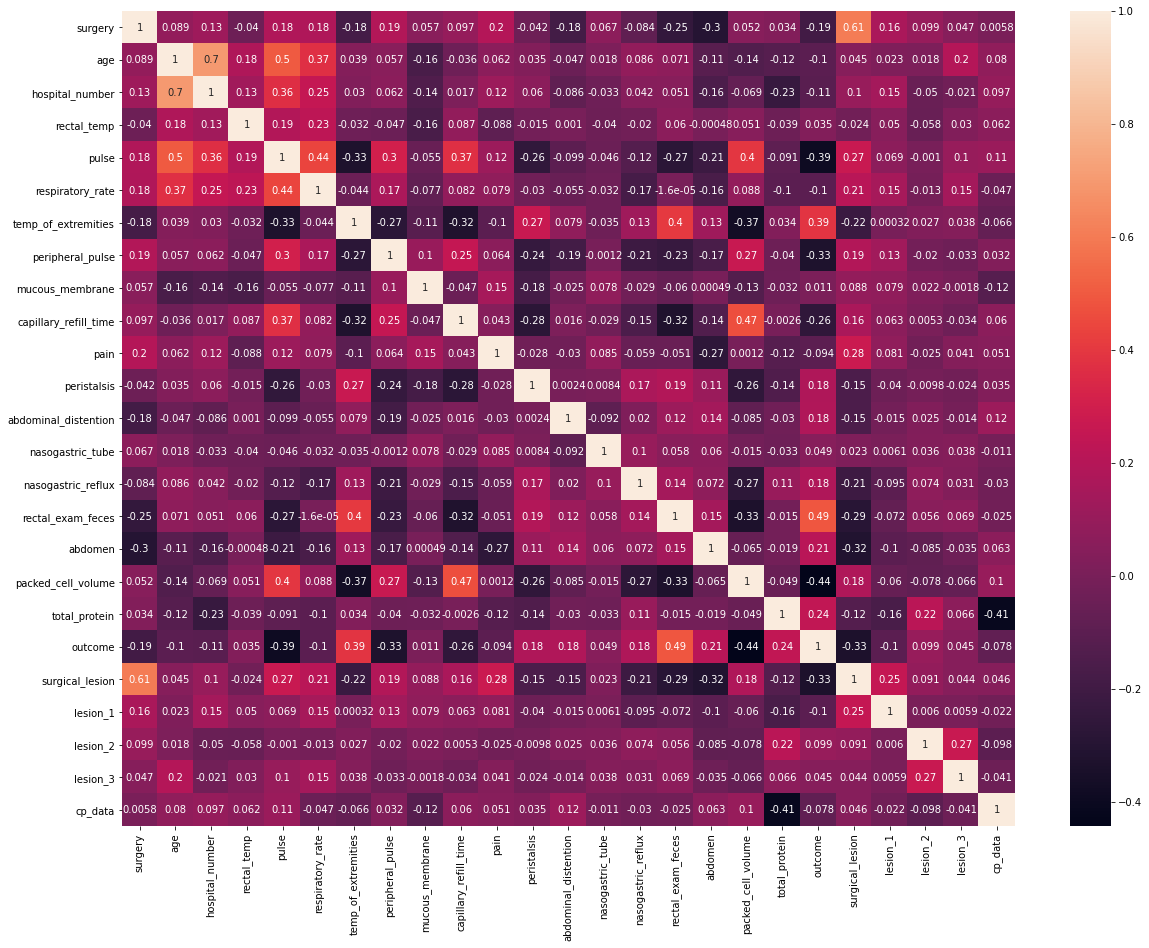

In [25]:
correlation_data = data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(correlation_data, annot=True)
plt.show()

In [26]:
correlation_values = correlation_data['outcome'].sort_values(ascending=False)
correlation_values = abs(correlation_values).sort_values(ascending=False)
print("Correlation of Features wrt Outcome - Highest to Lowest")
print(abs(correlation_values).sort_values(ascending=False))

Correlation of Features wrt Outcome - Highest to Lowest
outcome                  1.000000
rectal_exam_feces        0.487818
packed_cell_volume       0.442790
temp_of_extremities      0.390457
pulse                    0.389403
surgical_lesion          0.332933
peripheral_pulse         0.326043
capillary_refill_time    0.261947
total_protein            0.244050
abdomen                  0.214875
surgery                  0.189222
abdominal_distention     0.184764
peristalsis              0.181793
nasogastric_reflux       0.181422
hospital_number          0.106396
respiratory_rate         0.103874
age                      0.101782
lesion_1                 0.100738
lesion_2                 0.098993
pain                     0.093630
cp_data                  0.078066
nasogastric_tube         0.049156
lesion_3                 0.044631
rectal_temp              0.035336
mucous_membrane          0.011042
Name: outcome, dtype: float64


In [30]:
#Remove the features having less correlation
for col in range(len(correlation_values)):
    if abs(correlation_values[col]) < 0.3:
        data = data.drop([correlation_values.index[col]], axis=1)
data

KeyError: "['abdomen'] not found in axis"

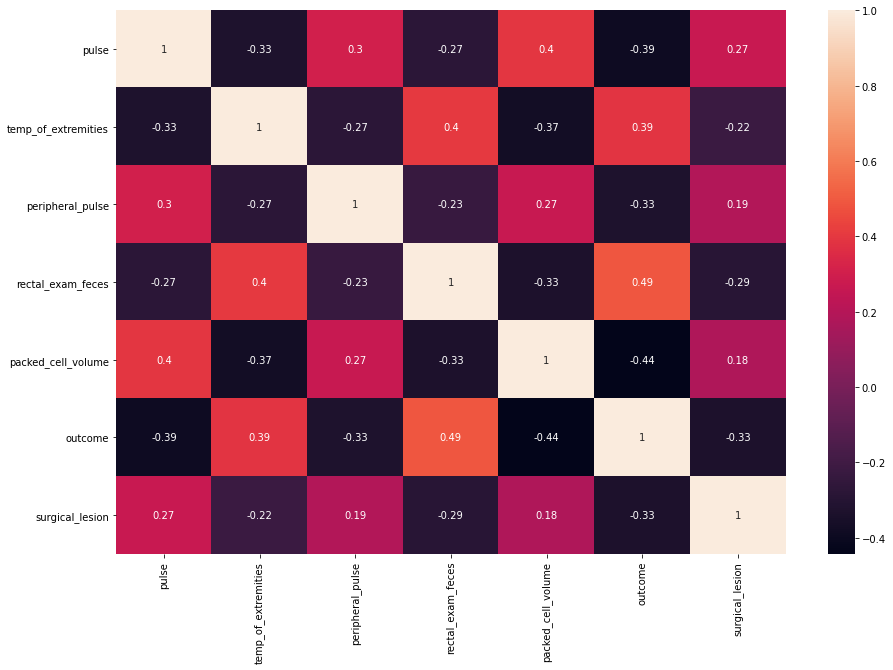

In [31]:
#New Correlation Matrix
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

Step 4. Data Partition (80% for training and 20% for testing) (Use scikit-learn)

In [32]:
X = data.drop(columns='outcome')
Y = data[['outcome']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

Step 5. Build the model (use scikit learn)

In [35]:
regression_model = LogisticRegression(multi_class='multinomial', C=10)
regression_model.fit(X_train, y_train)

LogisticRegression(C=10, multi_class='multinomial')

Step 6. Summarize the model

In [36]:
regression_model.get_params()

{'C': 10,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Step 7. Prediction

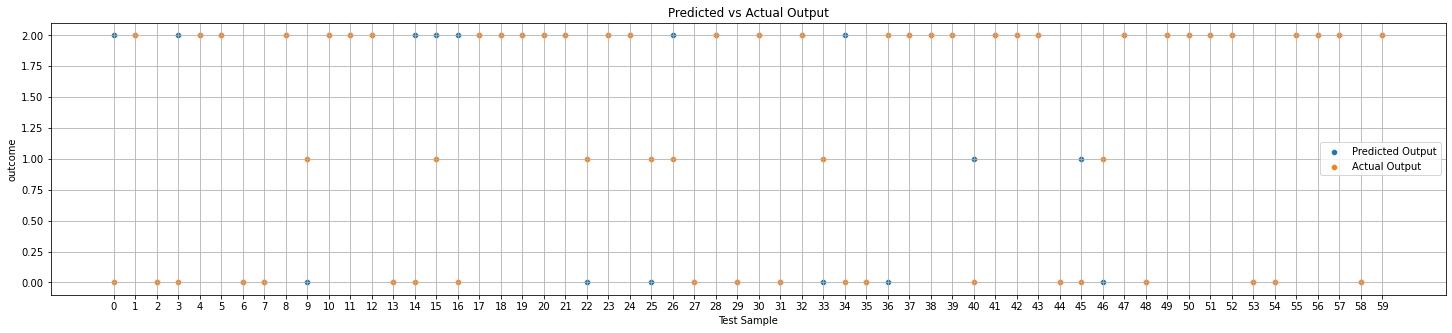

In [38]:
y_pred = regression_model.predict(X_test)
plt.figure(figsize=(25,5))
sns.scatterplot(range(len(y_pred)), y_pred, label="Predicted Output")
sns.scatterplot(range(len(y_pred)), y_test['outcome'], label="Actual Output")
plt.xticks(range(len(y_pred)))
plt.xlabel("Test Sample")
plt.title("Predicted vs Actual Output")
plt.grid()
plt.show()

Step 8. Evaluate the model

In [39]:
#Test Accuracy
print(f"Test Accuracy: {round(accuracy_score(y_test, y_pred) * 100,3)} %" )

Test Accuracy: 75.0 %


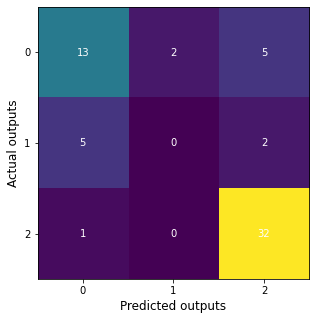

In [40]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [41]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67        20
           1       0.00      0.00      0.00         7
           2       0.82      0.97      0.89        33

    accuracy                           0.75        60
   macro avg       0.50      0.54      0.52        60
weighted avg       0.68      0.75      0.71        60



In [42]:
#ROC Curve
y_prob = regression_model.predict_proba(X_test)
n_classes = len(regression_model.classes_)

#ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

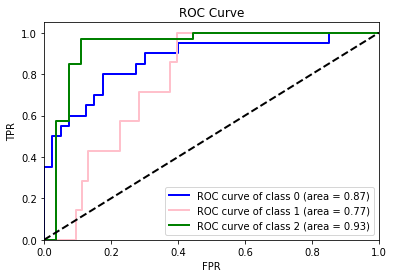

In [44]:
lw = 2   
colors = cycle(["blue", "pink", "green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

Step 9: Tuning the model

In [45]:
LR = LogisticRegression(multi_class='multinomial')
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, verbose = 3, cv=5)

# fitting the model for grid search 
LR_search.fit(X , Y)

Fitting 5 folds for each of 735 candidates, totalling 3675 fits
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV 2/5] END C=0.001,

[CV 3/5] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s


[CV 2/5] END C=0.001, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 3/5] END C=0.001, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 4/5] END C=0.001, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 5/5] END C=0.001, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=0.001, max_iter=300, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 2/5] END C=0.001, max_iter=300, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 3/5] END C=0.001, max_iter=300, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 4/5] END C=0.001, max_iter=300, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 5/5] END C=0.001, max_iter=300, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 1/5] END C=0.001, max_iter=300, penalty=elasticnet, solver=sag; total time=   0.0s
[CV 2/5] END C=0.001, max_iter=300, penalty=elasticnet, solver=sag; total time=   0.0s
[CV 3

[CV 5/5] END C=0.001, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV 1/5] END ..C=0.001, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV 2/5] END ..C=0.001, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV 3/5] END ..C=0.001, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV 4/5] END ..C=0.001, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV 5/5] END ..C=0.001, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV 1/5] END .C=0.001, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 2/5] END .C=0.001, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 3/5] END .C=0.001, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END .C=0.001, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END .C=0.001, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.001

[CV 3/5] END C=0.001, max_iter=600, penalty=l2, solver=liblinear; total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=l2, solver=liblinear; total time=   0.0s
[CV 5/5] END C=0.001, max_iter=600, penalty=l2, solver=liblinear; total time=   0.0s
[CV 1/5] END ..C=0.001, max_iter=600, penalty=l2, solver=sag; total time=   0.0s
[CV 2/5] END ..C=0.001, max_iter=600, penalty=l2, solver=sag; total time=   0.0s
[CV 3/5] END ..C=0.001, max_iter=600, penalty=l2, solver=sag; total time=   0.0s
[CV 4/5] END ..C=0.001, max_iter=600, penalty=l2, solver=sag; total time=   0.0s
[CV 5/5] END ..C=0.001, max_iter=600, penalty=l2, solver=sag; total time=   0.0s
[CV 1/5] END .C=0.001, max_iter=600, penalty=l2, solver=saga; total time=   0.0s
[CV 2/5] END .C=0.001, max_iter=600, penalty=l2, solver=saga; total time=   0.0s
[CV 3/5] END .C=0.001, max_iter=600, penalty=l2, solver=saga; total time=   0.0s
[CV 4/5] END .C=0.001, max_iter=600, penalty=l2, solver=saga; total time=   0.0s
[CV 5/5] END .C=

[CV 2/5] END C=0.001, max_iter=700, penalty=elasticnet, solver=saga; total time=   0.0s
[CV 3/5] END C=0.001, max_iter=700, penalty=elasticnet, solver=saga; total time=   0.0s
[CV 4/5] END C=0.001, max_iter=700, penalty=elasticnet, solver=saga; total time=   0.0s
[CV 5/5] END C=0.001, max_iter=700, penalty=elasticnet, solver=saga; total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END .C=0.01, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END .C=0.01, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/5] END .C=0.01, max_iter=100, penalty=l1, solver=lbfgs; tota

[CV 2/5] END ..C=0.01, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV 3/5] END ..C=0.01, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END ..C=0.01, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END ..C=0.01, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END .C=0.01, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END .C=0.01, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END .C=0.01, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END 

[CV 2/5] END C=0.01, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 1/5] END C=0.01, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=0.01, max_iter=300, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 3/5]

[CV 4/5] END ..C=0.01, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END ..C=0.01, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END .C=0.01, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END .C=0.01, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END .C=0.01, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END .C=0.01, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END .C=0.01, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/5] END 

[CV 1/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 2/5]

[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ..C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ..C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ..C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END ..C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END ..C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/5] END C

[CV 2/5] END C=0.1, max_iter=200, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=elasticnet, solver=sag; total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=elasticnet, solver=sag; total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=elasticnet, solver=sag; total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=elasticnet, solver=sag; total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=elasticnet, solver=sag; total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penal

[CV 2/5] END ...C=0.1, max_iter=400, penalty=l1, solver=saga; total time=   0.0s
[CV 3/5] END ...C=0.1, max_iter=400, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END ...C=0.1, max_iter=400, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END ...C=0.1, max_iter=400, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ..C=0.1, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ..C=0.1, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ..C=0.1, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END ..C=0

[CV 3/5] END ...C=0.1, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV 4/5] END ...C=0.1, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV 5/5] END ...C=0.1, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.1, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.1, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.1, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.1, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 2/5] END C=0.1, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 3/5] END C=0.1, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 4/5] END C=0.1, max_iter=500, penalty

[CV 1/5] END ...C=0.1, max_iter=700, penalty=l1, solver=saga; total time=   0.0s
[CV 2/5] END ...C=0.1, max_iter=700, penalty=l1, solver=saga; total time=   0.0s
[CV 3/5] END ...C=0.1, max_iter=700, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END ...C=0.1, max_iter=700, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END ...C=0.1, max_iter=700, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ..C=0.1, max_iter=700, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ..C=0.1, max_iter=700, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ..C=0

[CV 1/5] END .....C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV 2/5] END .....C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV 3/5] END .....C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV 4/5] END .....C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV 5/5] END .....C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=elasticnet, solver=lbfgs;

[CV 3/5] END .....C=1, max_iter=300, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END .....C=1, max_iter=300, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END .....C=1, max_iter=300, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ....C=1, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ....C=1, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ....C=1, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END ....C=1, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END ....C=1, max_it

[CV 3/5] END .....C=1, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV 4/5] END .....C=1, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV 5/5] END .....C=1, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=elasticnet, solve

[CV 5/5] END ....C=1, max_iter=600, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=liblinear; total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=liblinear; total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=liblinear; total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=liblinear; total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=liblinear; total time=   0.0s
[CV 1/5] END ......C=1, max_iter=600, penalty=l1, solver=sag; total time=   0.0s
[CV 2/5] END ......C=1, max_iter=600, penalty=l1, solver=sag; total time=   0.0s
[CV 3/5] END ......C=1, max_iter=600, penalty=l1, solver=sag; total time=   0.0s
[CV 4/5] END ......C=1, max_iter=600, penalty=l1, solver=sag; total time=   0.0s
[CV 5/5] END ......C=1, max_iter=600, penalty=l1, solver=sag; total time=   0.0s
[CV 1/5] END .....C=1, max_iter=600, penalty=l1, solver=saga; total time=   0.0s
[CV 2/5] END .....C=1, max_i

[CV 5/5] END ....C=1, max_iter=700, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=1, max_iter=700, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END C=1, max_iter=700, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/5] END C=1, max_iter=700, penalty=l2, solver=liblinear; total time=   0.0s
[CV 4/5] END C=1, max_iter=700, penalty=l2, solver=liblinear; total time=   0.0s
[CV 5/5] END C=1, max_iter=700, penalty=l2, solver=liblinear; total time=   0.0s
[CV 1/5] END ......C=1, max_iter=700, penalty=l2, solver=sag; total time=   0.0s
[CV 2/5] END ......C=1, max_iter=700, penalty=l2, solver=sag; total time=   0.0s
[CV 3/5] END ......C=1, max_iter=700, penalty=l2, solver=sag; total time=   0.0s
[CV 4/5] END ......C=1, max_iter=700, penalty=l2, solver=sag; total time=   0.0s
[CV 5/5] END ......C=1, max_iter=700, penalty=l2, solver=sag; total time=   0.0s
[CV 1/5] END .....C=1, max_iter=700, penalty=l2, solver=saga; total time=   0.0s
[CV 2/5] END .....C=1, max_i

[CV 1/5] END C=10, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END ...C=10, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END ...C=10, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/5] END ...C=10, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 4/5] END ...C=10, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 5/5] END ...C=10, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV 3/5] END C=10, ma

[CV 1/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ...C=10, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ...C=10, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ...C=10, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END ...C=10, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END ...C=10, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/5] END C=10, ma

[CV 3/5] END ....C=10, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END ....C=10, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END ....C=10, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ...C=10, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ...C=10, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ...C=10, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END ...C=10, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END ...C=10, m

[CV 1/5] END C=10, max_iter=600, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=10, max_iter=600, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=10, max_iter=600, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=10, max_iter=600, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=10, max_iter=600, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 1/5] END C=10, max_iter=600, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 2/5] END C=10, max_iter=600, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 3/5] END C=10, max_iter=600, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 4/5] END C=10, max_iter=600, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 5/5] END C=10, max_iter=600, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=10, max_iter=600, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 2/5] END C=10, max_iter=60

[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ..C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ..C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ..C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END ..C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END ..C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV 4/5] END C

[CV 3/5] END C=100, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 4/5] END C=100, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 5/5] END C=100, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=100, max_iter=200, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 2/5] END C=100, max_iter=200, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 3/5] END C=100, max_iter=200, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 4/5] END C=100, max_iter=200, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 5/5] END C=100, max_iter=200, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 1/5] END C=100, max_iter=200, penalty=elasticnet, solver=sag; total time=   0.0s
[CV 2/5] END C=100, max_iter=200, penalty=elasticnet, solver=sag; total time=   0.0s
[CV 3/5] END C=100, max_iter=200, penalty=elasticnet, solver=sag; total time=   0.0s
[CV 4/5] END C=100, max_iter=

[CV 2/5] END ...C=100, max_iter=400, penalty=l1, solver=saga; total time=   0.0s
[CV 3/5] END ...C=100, max_iter=400, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END ...C=100, max_iter=400, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END ...C=100, max_iter=400, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END C=100, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=100, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=100, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=100, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=100, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ..C=100, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ..C=100, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ..C=100, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END ..C=1

[CV 3/5] END C=100, max_iter=600, penalty=l1, solver=liblinear; total time=   0.0s
[CV 4/5] END C=100, max_iter=600, penalty=l1, solver=liblinear; total time=   0.0s
[CV 5/5] END C=100, max_iter=600, penalty=l1, solver=liblinear; total time=   0.0s
[CV 1/5] END ....C=100, max_iter=600, penalty=l1, solver=sag; total time=   0.0s
[CV 2/5] END ....C=100, max_iter=600, penalty=l1, solver=sag; total time=   0.0s
[CV 3/5] END ....C=100, max_iter=600, penalty=l1, solver=sag; total time=   0.0s
[CV 4/5] END ....C=100, max_iter=600, penalty=l1, solver=sag; total time=   0.0s
[CV 5/5] END ....C=100, max_iter=600, penalty=l1, solver=sag; total time=   0.0s
[CV 1/5] END ...C=100, max_iter=600, penalty=l1, solver=saga; total time=   0.0s
[CV 2/5] END ...C=100, max_iter=600, penalty=l1, solver=saga; total time=   0.0s
[CV 3/5] END ...C=100, max_iter=600, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END ...C=100, max_iter=600, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END ...C=100,

[CV 1/5] END ...C=100, max_iter=700, penalty=l2, solver=saga; total time=   0.0s
[CV 2/5] END ...C=100, max_iter=700, penalty=l2, solver=saga; total time=   0.0s
[CV 3/5] END ...C=100, max_iter=700, penalty=l2, solver=saga; total time=   0.0s
[CV 4/5] END ...C=100, max_iter=700, penalty=l2, solver=saga; total time=   0.0s
[CV 5/5] END ...C=100, max_iter=700, penalty=l2, solver=saga; total time=   0.0s
[CV 1/5] END C=100, max_iter=700, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=100, max_iter=700, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 1/5] END C=100, max_iter=700, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=elasticnet,

[CV 4/5] END ..C=1000, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END ..C=1000, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END .C=1000, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END .C=1000, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END .C=1000, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END .C=1000, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END .C=1000, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/5] END 

[CV 1/5] END C=1000, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=1000, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=1000, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=1000, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=1000, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 1/5] END C=1000, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 2/5] END C=1000, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 3/5] END C=1000, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 4/5] END C=1000, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 5/5] END C=1000, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=1000, max_iter=300, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 2/5]

[CV 3/5] END ..C=1000, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END ..C=1000, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END ..C=1000, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END C=1000, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=1000, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=1000, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=1000, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=1000, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END .C=1000, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END .C=1000, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END .C=1000, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END .C=1000, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END 

[CV 1/5] END ..C=1000, max_iter=600, penalty=l2, solver=saga; total time=   0.0s
[CV 2/5] END ..C=1000, max_iter=600, penalty=l2, solver=saga; total time=   0.0s
[CV 3/5] END ..C=1000, max_iter=600, penalty=l2, solver=saga; total time=   0.0s
[CV 4/5] END ..C=1000, max_iter=600, penalty=l2, solver=saga; total time=   0.0s
[CV 5/5] END ..C=1000, max_iter=600, penalty=l2, solver=saga; total time=   0.0s
[CV 1/5] END C=1000, max_iter=600, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=1000, max_iter=600, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 1/5] END C=1000, max_iter=600, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=elas

[CV 5/5] END C=1000, max_iter=700, penalty=elasticnet, solver=saga; total time=   0.0s


GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=3)

In [47]:
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Best Parameters: %s' % LR_search.best_params_)

Mean Accuracy: 0.726
Best Parameters: {'C': 1000, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [48]:
LR_tuned = LogisticRegression(**LR_search.best_params_, multi_class='multinomial')
LR_tuned.fit(X_train, y_train)

LogisticRegression(C=1000, multi_class='multinomial')

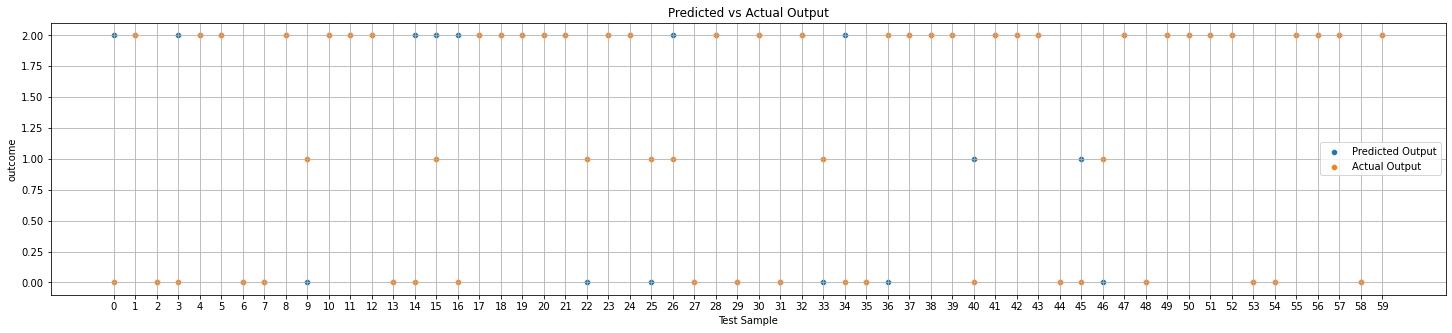

In [49]:
y_pred = LR_tuned.predict(X_test)
plt.figure(figsize=(25,5))
sns.scatterplot(range(len(y_pred)), y_pred, label="Predicted Output")
sns.scatterplot(range(len(y_pred)), y_test['outcome'], label="Actual Output")
plt.xticks(range(len(y_pred)))
plt.xlabel("Test Sample")
plt.title("Predicted vs Actual Output")
plt.grid()
plt.show()

In [50]:
print(f"Test Accuracy: {round(accuracy_score(y_test, y_pred) * 100,3)} %" )

Test Accuracy: 75.0 %


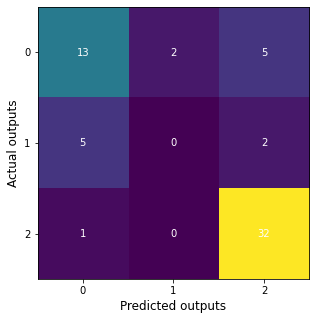

In [51]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67        20
           1       0.00      0.00      0.00         7
           2       0.82      0.97      0.89        33

    accuracy                           0.75        60
   macro avg       0.50      0.54      0.52        60
weighted avg       0.68      0.75      0.71        60



In [53]:
y_prob = LR_tuned.predict_proba(X_test)
n_classes = len(LR_tuned.classes_)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

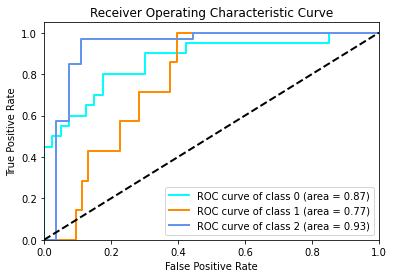

In [54]:
lw = 2   
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()